# Clustering Primary School network

In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import xgi
from scipy.cluster import hierarchy
from collections import defaultdict
from itertools import combinations, product

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

from hyperfunctions import *
from modularity_functions import *

##  Constructing the Hypergraph

We create the hypergraph with the students and teachers of a Primary School

In [2]:
df = pd.read_csv('Datasets/Primary_edges.csv' , sep = ';', header=None)

hyperedge_dict = {}
for index, hyperedge in enumerate(df[0]):
    hyperedge_dict[index] = hyperedge.split(",")

H = xgi.Hypergraph(hyperedge_dict)
H.remove_edges_from(H.edges.singletons())

In [3]:
print(len(H.nodes), len(H.edges))

242 12699


In [4]:
nodes_list = list(H.nodes)

In [5]:
df_idtags = pd.read_csv('Datasets/Primary_idtags.csv' , sep = ';', header=None)
df_tags = pd.read_csv('Datasets/Primary_tags.csv' , sep = ';', header=None)

In [6]:
tag_dict = {}
for index, tag in enumerate(df_tags[0]):
    tag_dict[index+1] = tag

In [7]:
idtag_dict = {}
for index, name in enumerate(df_idtags[0]):
    idtag_dict[index+1] = name

## Communities

In [8]:
derivative = derivative_list(H)

In [9]:
method = "average"

Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1210 ticks ([1.0, ..., 2419.0]), which exc

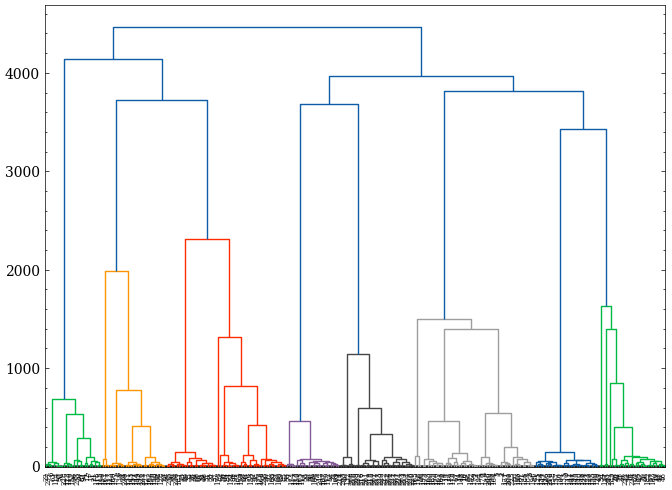

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

Z = hierarchy.linkage(derivative, method)
dn = hierarchy.dendrogram(Z, labels = nodes_list, orientation='top', count_sort='ascending', ax=ax)

plt.show()

## General (us)

In [11]:
h_cut, num_fusion = height_based_cut(Z)

In [12]:
cuttree = hierarchy.cut_tree(Z, height = h_cut)

# Assign each node to its community
node_community_dict = {}
for index, node in enumerate(H.nodes):
    node_community_dict[node] = cuttree[index][0]

# Assign each community its nodes
communities_dict = defaultdict(set)
for node, comm in node_community_dict.items():
    communities_dict[comm].add(node)

In [13]:
Num_communities = len(set(node_community_dict.values()))
print(Num_communities)

8


In [14]:
nodeset_list = []
for nodeset in communities_dict.values():
    nodeset_list.append(nodeset)
    tag_list = []
    for node in list(nodeset):
        tag_list.append(tag_dict[idtag_dict[int(node)]])
    print(tag_list)
    #print(nodeset)

    print("###")

['3B', '3A', '3B', '3A', '3B', '3B', '3A', '3B', '3B', '3A', '3A', '3A', '3B', '3B', '3A', '3B', '3B', '3A', '3B', '3A', '3A', '3A', '3A', '3B', '3B', '3B', '3A', '3B', '3B', 'Teachers', '3B', '3A', '3B', '3A', 'Teachers', '3A', '3B', '3A', '3A', '3B', '3B', '3A', '3B', '3A', '3A', '3A', '3A']
###
['4A', '4A', '4A', '4A', '4A', '5B', '4A', '4A', '4A', '4A', '4A', '4A', '4A', '4A', '4B', '4A', 'Teachers', '4A', '4B', '4A', '4A', '4A', '4A', '4A', '4A']
###
['4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', 'Teachers', '4B', '4B']
###
['5B', '5A', '5A', '5B', '5A', '5A', '5B', '5A', '5B', '5B', '5B', '5B', '5B', 'Teachers', 'Teachers', '5B', '5B', '5B', '5A', '5B', '5A', '5A', '5A', '5B', '5B', '5A', '5A', '5A', '5A', '5B', '5A', '5B', '5B', '5B', '5A', '5A', '5A', '5B', '5A', '5A', '5B', '5B', '5B', '5B', '5A', '5A', '5A']
###
['2B', '2B', '2A', '2B', '2B', '2B', '2B', '2B', '2B', '2B', 'Teachers', '2B', '2B', '2B', '2B', '

In [15]:
partition_general = nodeset_list

## Modularity (us)

In [16]:
A, G, mapping = reduced_adjacency_matrix(H)

In [17]:
Modularity = calculate_modularities(H, G, Z)

-- 0.0% --
-- 0.2066115702479339% --
-- 0.4132231404958678% --
-- 0.6198347107438017% --
-- 0.8264462809917356% --


*Conclusion*: the general method coincides with our modularity maximization in this example

In [18]:
m = max(Modularity)
num_fusion = [i for i, j in enumerate(Modularity) if j == m]
index_max = num_fusion[0]

print(f'Number of communities maximizing the modularity is: {index_max},')
print(f'with modularity: {m}')

Number of communities maximizing the modularity is: 6,
with modularity: 0.4346482178213198


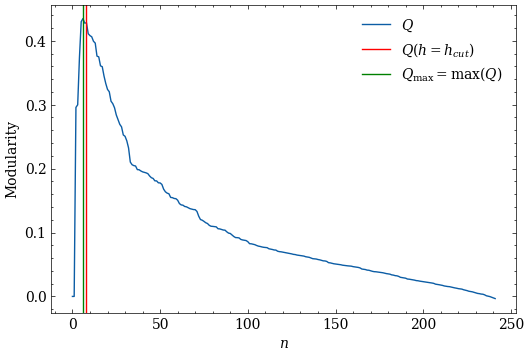

In [19]:
plt.figure(figsize=(6,4))
#plt.title("Modularity score vs Number of communities")
plt.plot(range(len(H.nodes)), Modularity, label='$Q$')
#plt.grid()
plt.axvline(Num_communities, color='r', label='$ Q(h=h_{cut}) $ ')
plt.axvline(index_max, color='g', label='$ Q_{\max}=\max(Q) $ ')

plt.ylabel('Modularity')
plt.xlabel('$ n $')

plt.legend()

plt.savefig('Figures/modularity_primary.svg')

In [20]:
communities_dict = communities(H, derivative, method, n_clusters=index_max)

nodeset_list = []
for nodeset in communities_dict.values():
    nodeset_list.append(nodeset)
    tag_list = []
    for node in list(nodeset):
        tag_list.append(tag_dict[idtag_dict[int(node)]])
    print(tag_list)
    #print(nodeset)

    print("###")

['3B', '3A', '3B', '3A', '3B', '3B', '3A', '3B', '3B', '3A', '3A', '3A', '3B', '3B', '3A', '3B', '3B', '3A', '3B', '3A', '3A', '3A', '3A', '3B', '3B', '3B', '3A', '3B', '3B', 'Teachers', '3B', '3A', '3B', '3A', 'Teachers', '3A', '3B', '3A', '3A', '3B', '3B', '3A', '3B', '3A', '3A', '3A', '3A']
###
['4A', '4A', '4A', '4A', '4A', '5B', '4A', '4A', '4A', '4A', '4A', '4A', '4A', '4A', '4B', '4A', 'Teachers', '4A', '4B', '4A', '4A', '4A', '4A', '4A', '4A']
###
['4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', '4B', 'Teachers', '4B', '4B']
###
['5B', '5A', '5A', '5B', '5A', '5A', '5B', '5A', '5B', '5B', '5B', '5B', '5B', 'Teachers', 'Teachers', '5B', '5B', '5B', '5A', '5B', '5A', '5A', '5A', '5B', '5B', '5A', '5A', '5A', '5A', '5B', '5A', '5B', '5B', '5B', '5A', '5A', '5A', '5B', '5A', '5A', '5B', '5B', '5B', '5B', '5A', '5A', '5A']
###
['2B', '2B', '2A', '2A', '2A', '2A', '2B', '2B', '2A', '2A', '2A', '2B', 'Teachers', '2B', '2A', '

In [21]:
partition_modularity = nodeset_list

## Modularity (Kumar)

In [22]:
clusters = IRMM_algorithm(H, tol=1e-3)

It converged after 28 iterations


In [23]:
print(clusters)

[{130, 131, 132, 5, 4, 6, 7, 8, 137, 138, 153, 26, 27, 158, 159, 39, 40, 41, 169, 171, 44, 45, 46, 172, 176, 177, 43, 183, 188, 189, 192, 200, 72, 83, 212, 84, 214, 216, 223, 225, 226, 229, 234, 238, 241, 119}, {0, 1, 2, 129, 128, 141, 21, 23, 25, 154, 29, 30, 35, 36, 37, 38, 167, 178, 54, 55, 184, 56, 60, 190, 66, 75, 76, 82, 213, 215, 88, 218, 97, 98, 99, 100, 101, 105, 106, 107, 236, 113, 114, 115, 120, 125, 126}, {12, 13, 142, 144, 148, 150, 22, 151, 152, 155, 156, 31, 165, 166, 42, 174, 175, 52, 53, 185, 57, 59, 58, 191, 193, 69, 198, 70, 71, 74, 204, 79, 80, 209, 208, 211, 86, 90, 219, 91, 92, 227, 230, 231, 104, 232, 235, 240, 116, 117, 121}, {3, 133, 135, 9, 10, 11, 139, 140, 14, 15, 16, 17, 18, 28, 157, 33, 34, 164, 170, 173, 47, 48, 50, 180, 181, 182, 186, 195, 197, 199, 201, 202, 78, 81, 85, 87, 89, 220, 94, 95, 224, 96, 228, 110, 111, 112, 239, 118}, {64, 194, 68, 196, 134, 203, 77, 143, 207, 145, 146, 147, 221, 222, 160, 161, 32, 163, 168, 233, 109, 127, 49, 51, 124, 63}, 

In [32]:
raise Error

nodeset_list_K = []
for nodeset in clusters:
    nodeset_list_K.append(nodeset)
    tag_list = []
    for node in list(nodeset):
        tag_list.append(tag_dict[idtag_dict[int(node)+1]])
    print(tag_list)
    #print(nodeset)

    print("###")

NameError: name 'Error' is not defined

In [33]:
q = nx.community.modularity(G, clusters)
print(f'The modularity for this partition is: {q}')

NotAPartition: Graph with 242 nodes and 8501 edges is not a valid partition of the graph [{130, 131, 132, 5, 4, 6, 7, 8, 137, 138, 153, 26, 27, 158, 159, 39, 40, 41, 169, 171, 44, 45, 46, 172, 176, 177, 43, 183, 188, 189, 192, 200, 72, 83, 212, 84, 214, 216, 223, 225, 226, 229, 234, 238, 241, 119}, {0, 1, 2, 129, 128, 141, 21, 23, 25, 154, 29, 30, 35, 36, 37, 38, 167, 178, 54, 55, 184, 56, 60, 190, 66, 75, 76, 82, 213, 215, 88, 218, 97, 98, 99, 100, 101, 105, 106, 107, 236, 113, 114, 115, 120, 125, 126}, {12, 13, 142, 144, 148, 150, 22, 151, 152, 155, 156, 31, 165, 166, 42, 174, 175, 52, 53, 185, 57, 59, 58, 191, 193, 69, 198, 70, 71, 74, 204, 79, 80, 209, 208, 211, 86, 90, 219, 91, 92, 227, 230, 231, 104, 232, 235, 240, 116, 117, 121}, {3, 133, 135, 9, 10, 11, 139, 140, 14, 15, 16, 17, 18, 28, 157, 33, 34, 164, 170, 173, 47, 48, 50, 180, 181, 182, 186, 195, 197, 199, 201, 202, 78, 81, 85, 87, 89, 220, 94, 95, 224, 96, 228, 110, 111, 112, 239, 118}, {64, 194, 68, 196, 134, 203, 77, 143, 207, 145, 146, 147, 221, 222, 160, 161, 32, 163, 168, 233, 109, 127, 49, 51, 124, 63}, {65, 67, 136, 73, 205, 206, 210, 19, 20, 149, 24, 217, 93, 162, 102, 103, 123, 108, 237, 179, 122, 187, 61, 62}]

In [34]:
partition_Kumar = nodeset_list_K